# Pytorch Tutorial 
Prepared by: Shayan Vassef, Email: sh.vassef





![Pytorch](https://drive.google.com/uc?export=view&id=14HmbCV22D052ywxAyu5j3vu1DUnrlqLj)

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Pytorch Basics**

In [ ]:
import torch

In [ ]:
x = torch.tensor([1,2,3])
x

tensor([1, 2, 3])

In [ ]:
x = torch.rand(3)
x

tensor([0.4595, 0.7038, 0.1954])

In [ ]:
x = torch.rand(3,5,dtype=torch.float16)
x

tensor([[0.3813, 0.1470, 0.7236, 0.1143, 0.7983],
        [0.9834, 0.0015, 0.8564, 0.5391, 0.5967],
        [0.8579, 0.0381, 0.7275, 0.2676, 0.9385]], dtype=torch.float16)

In [ ]:
from torch._C import dtype
import numpy as np
arr = np.random.randn(3,4)
x = torch.from_numpy(arr)
x

tensor([[-1.0008, -1.0003,  0.4646, -0.4147],
        [-1.6396, -0.5620,  0.0696,  1.3053],
        [-2.6480, -0.6226,  1.0265,  1.7258]], dtype=torch.float64)

In [ ]:
x.type(torch.float16) 

tensor([[-1.0010, -1.0000,  0.4646, -0.4148],
        [-1.6396, -0.5620,  0.0696,  1.3057],
        [-2.6484, -0.6226,  1.0264,  1.7256]], dtype=torch.float16)

In [ ]:
x = torch.rand(3)
print(x)
y = torch.ones(3)
x.add(y)

tensor([0.7126, 0.3163, 0.3549])


tensor([1.7126, 1.3163, 1.3549])

In [ ]:
x.add_(y)

tensor([1.7126, 1.3163, 1.3549])

In [ ]:
x =  torch.empty(3,5)
print(x)
x.view(-1,3)

tensor([[4.2350e-34, 0.0000e+00, 3.5032e-44, 0.0000e+00,        nan],
        [1.6775e+00, 1.1578e+27, 7.1463e+22, 4.6241e+30, 1.0552e+24],
        [5.5757e-02, 1.8728e+31, 5.9571e-02, 7.0374e+22, 2.7558e-09]])


tensor([[4.2350e-34, 0.0000e+00, 3.5032e-44],
        [0.0000e+00,        nan, 1.6775e+00],
        [1.1578e+27, 7.1463e+22, 4.6241e+30],
        [1.0552e+24, 5.5757e-02, 1.8728e+31],
        [5.9571e-02, 7.0374e+22, 2.7558e-09]])

In [ ]:
# first, change the runtime to gpu
if torch.cuda.is_available():
  device = 'cuda' #torch.device("cuda")
  x = torch.ones(5, device = device)
  # or
  y = torch.rand(5).to(device)
  z = x + y
  print(z)
  # return back to cpu
  print(z.to("cpu").numpy()) # produce an error
  

tensor([1.2063, 1.1087, 1.1052, 1.3392, 1.5358], device='cuda:0')
[1.2062893 1.1086557 1.1052477 1.3392262 1.5358253]


# **Gradient**

## Vector differentiation

![part1](https://drive.google.com/uc?export=view&id=1u2dcTLn2v5kNH4fy0sK910GLUPiWTUgL)

![part2](https://drive.google.com/uc?export=view&id=1Ynr_vXxLqsB5g6f0kHn40eXsvvkmsNr0)

## 1*1 tensor

Z = z(1,3) * I(3,1)
D Z / D x = D (z(1,3) * I(3,1))/ D x = D z / D x * I

In [ ]:
x = torch.rand(3,requires_grad=True)
print(x)
y = x + 2
z= 2 * y**2
z = z.mean() 
z

tensor([0.5348, 0.8765, 0.3493], requires_grad=True)


tensor(13.4789, grad_fn=<MeanBackward0>)

In [ ]:
z.backward() # Calculate dz/dx

In [ ]:
x.grad

tensor([3.3797, 3.8353, 3.1324])

In [ ]:
x = torch.rand(3,requires_grad=True)
y = x + 2
z= 2 * y**2

z.backward()

RuntimeError: ignored

## 1*n tensor

In [ ]:
x = torch.ones(2,3,requires_grad=True)
y = x + 2
z = 2 * y**2 

v = torch.tensor([[0.1 , 0.5 , 0.3 ],[0.1,0.5,0.3]]) # weighted sum (f =  z * v.t) 
z.backward(v)

x.grad

tensor([[1.2000, 6.0000, 3.6000],
        [1.2000, 6.0000, 3.6000]])

## prevent pytorch from tracking gradient
  * x.requires_grad = False
  * x.detach()
  * with torch.no_grad()
  

In [ ]:
x = torch.rand(3,requires_grad=True)
print(x)
x.requires_grad_(False) # No longer tracking

tensor([0.8616, 0.9201, 0.4289], requires_grad=True)


tensor([0.8616, 0.9201, 0.4289])

In [ ]:
x = torch.rand(3,requires_grad=True)
print(x)
y = x.detach() # No longer tracking
print(y)

tensor([0.4289, 0.2454, 0.7642], requires_grad=True)
tensor([0.4289, 0.2454, 0.7642])


In [ ]:
x = torch.rand(3,requires_grad=True)
print(x)
with torch.no_grad():
  y = x + 3
print(y)

tensor([0.1024, 0.5840, 0.7556], requires_grad=True)
tensor([3.1024, 3.5840, 3.7556])


## .grad will sum the previously calculated gradient to the actual ones

In [ ]:
w = torch.ones(4 , requires_grad = True)
for noe in range(3):
  y = (w*3).sum()
  y.backward()
  print(w.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [ ]:
w = torch.ones(4 , requires_grad = True)
for noe in range(3):
  y = (w*3).sum()
  y.backward()
  print(w.grad)
  w.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# **Backprobagation**

In [ ]:
x = torch.tensor(1,dtype=torch.float32)

y = torch.tensor(2,dtype=torch.float32)

w = torch.tensor(1,dtype=torch.float32,requires_grad=True) 

yhat = w * x
loss = (y - yhat)**2
print(loss)

loss.backward() # d loss / d w
print(w.grad)

## next, update weights and then start forwarding , ...

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# Implementing all in pytorch

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([1,2,3,4] , dtype = torch.float32).view(4,-1)
y = torch.tensor([2,4,6,8] , dtype = torch.float32).view(4,-1)
x_test = torch.tensor([5],dtype=torch.float32) 

num_sam , num_feat = x.size() # (row, column)

print(num_sam , num_feat) 

input_size = num_feat # refer to input dimention
output_size = num_feat # refer to output dimention

model = nn.Linear(input_size , output_size) 

print(f"Model's prediction before training for x = 5: {model(x_test).item():.3f}\n")

lr = 0.01
epochs = 100
   
loss = nn.MSELoss() # creat an instance of MSE class
optimizer = torch.optim.SGD(model.parameters(),lr = lr)

for epoch in range(epochs):
  # forwarding
  y_pred = model(x)
  # loss
  l = loss(y,y_pred)
  # backward
  l.backward()
  #optimizer => updating weights
  optimizer.step()
  #reset gradient
  optimizer.zero_grad()

  if epoch % 10 ==0 :
    w , b = model.parameters()
    print(f"Epoch : {epoch} , w : {w[0][0].item()} , loss : {l}\n")

print(f'Model prediction aftre training for an arbitrary input : {x_test.item()} is {model(x_test).item():.3f}')

4 1
Model's prediction before training for x = 5: 4.312

Epoch : 0 , w : 1.1244351863861084 , loss : 10.70458984375

Epoch : 10 , w : 1.8731905221939087 , loss : 0.27735230326652527

Epoch : 20 , w : 1.9932128190994263 , loss : 0.007551664020866156

Epoch : 30 , w : 2.0121161937713623 , loss : 0.0005494178622029722

Epoch : 40 , w : 2.0147664546966553 , loss : 0.00034765468444675207

Epoch : 50 , w : 2.0148143768310547 , loss : 0.0003230239963158965

Epoch : 60 , w : 2.0144546031951904 , loss : 0.00030410438193939626

Epoch : 70 , w : 2.014039993286133 , loss : 0.00028640052187256515

Epoch : 80 , w : 2.013627290725708 , loss : 0.0002697323798201978

Epoch : 90 , w : 2.0132250785827637 , loss : 0.0002540323475841433

Model prediction aftre training for an arbitrary input : 5.0 is 10.027


In [ ]:
print(model(x_test))
print(model(x_test).detach())
print(model(x_test).item())

tensor([10.0265], grad_fn=<AddBackward0>)
tensor([10.0265])
10.02651596069336


## Define by nn.Module

Class LinearRegression:
  def __init__(self, input_size, output_size, ...):
    self. input_size = input_size
    ....
  def Att.1 (...):


Class Virus:
  .....

Class Corona_Virus(Virus):
  .....


In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([1,2,3,4] , dtype = torch.float32).view(4,-1)
y = torch.tensor([2,4,6,8] , dtype = torch.float32).view(4,-1)
x_test = torch.tensor([5],dtype=torch.float32)

num_sam , num_feat = x.size()

print(num_sam , num_feat)

input_size = num_feat # refer to inpt dimention
output_size = num_feat # refer to output dimention

class LinearRegression(nn.Module):
  def __init__(self , In_size , O_size ):
    super(LinearRegression, self).__init__() # super().forward # nn.Module.forward()
    # define layes
    self.lin = nn.Linear(In_size , O_size)

  def forward(self , x):
    return self.lin(x)

model = LinearRegression(input_size , output_size)
print(f"Model's prediction before training for x = 5: {model(x_test).item():.3f}\n")

lr = 0.01
epochs = 100

loss = nn.MSELoss() # creat an instance of MSE class
optimizer = torch.optim.SGD(model.parameters(),lr = lr)

for epoch in range(epochs):
  # forwarding
  y_pred = model(x)
  # loss
  l = loss(y,y_pred)
  # backward
  l.backward()
  #optimizer => updating weights
  optimizer.step()
  #reset gradient
  optimizer.zero_grad()

  if epoch % 10 ==0 :
    w , b = model.parameters()
    print(f"Epoch : {epoch} , w : {w[0][0].item()} , loss : {l}\n")

print(f'Model prediction aftre training for an arbitrary input : {x_test.item()} is {model(x_test).item():.3f}')

4 1
Model's prediction before training for x = 5: -2.654

Epoch : 0 , w : -0.30139246582984924 , loss : 44.71574783325195

Epoch : 10 , w : 1.2384709119796753 , loss : 1.4677343368530273

Epoch : 20 , w : 1.4977164268493652 , loss : 0.33071279525756836

Epoch : 30 , w : 1.550634503364563 , loss : 0.2842564582824707

Epoch : 40 , w : 1.5700336694717407 , loss : 0.26700717210769653

Epoch : 50 , w : 1.5837194919586182 , loss : 0.2514478862285614

Epoch : 60 , w : 1.5961744785308838 , loss : 0.23681189119815826

Epoch : 70 , w : 1.608128547668457 , loss : 0.2230280339717865

Epoch : 80 , w : 1.6197081804275513 , loss : 0.2100467085838318

Epoch : 90 , w : 1.6309422254562378 , loss : 0.19782082736492157

Model prediction aftre training for an arbitrary input : 5.0 is 9.260


## **Logistic regression**

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

  * 0 : prepare the data
  * 1 : model
  * 2 : loss , optimizer
  * 3 : training loop
  

In [ ]:
#step 0
bc = datasets.load_breast_cancer()
x , y = bc.data , bc.target

n_samples , n_features = x.shape
print(n_samples , n_features)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=111)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1) # Converting to one column
y_test = y_test.view(y_test.shape[0],1) # Converting to one column
# step 1, model
# f = w.x , apply sigmoid at the end
class LogisticRegression(nn.Module):
  def __init__(self,n_input_features):
    super(LogisticRegression , self).__init__()
    self.lin = nn.Linear(n_input_features , 1)
  def forward(self , x):
    return torch.sigmoid(self.lin(x))

model = LogisticRegression(n_features)

# 2 : define loss and optimizer
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)
# 3 : train the model
n_epcohs = 100
for epoch in range(n_epcohs):
  y_train_pred  = model(x_train)
  # define loss
  l = loss(y_train_pred , y_train)
  # backprog
  l.backward()
  #update gd
  optimizer.step()

  optimizer.zero_grad()

  with torch.no_grad():
    y_test_pred = model(x_test)
    y_np = y_test_pred.numpy() # y_test_pred_cls = y_test_pred.round()
    label = (y_np >= 0.5).astype(np.float32) 
    acc = np.round(np.sum((label == y_test.numpy())/label.shape[0])*100,2) # acc = y_test_pred_cls.eq(y_test).sum()/float(y_test.shape[0])*100
  if (epoch+1) % 10 ==0:
    print(f"Training for => Epoch : {epoch+1} ,  loss : {l.item():.4f}")
    print(f"The Accuracy on the test data on Epoch {epoch +1 } is : {acc}%\n")


569 30
Training for => Epoch : 10 ,  loss : 0.6142
The Accuracy on the test data on Epoch 10 is : 67.83%

Training for => Epoch : 20 ,  loss : 0.5109
The Accuracy on the test data on Epoch 20 is : 85.31%

Training for => Epoch : 30 ,  loss : 0.4447
The Accuracy on the test data on Epoch 30 is : 88.11%

Training for => Epoch : 40 ,  loss : 0.3984
The Accuracy on the test data on Epoch 40 is : 89.51%

Training for => Epoch : 50 ,  loss : 0.3642
The Accuracy on the test data on Epoch 50 is : 90.21%

Training for => Epoch : 60 ,  loss : 0.3376
The Accuracy on the test data on Epoch 60 is : 91.61%

Training for => Epoch : 70 ,  loss : 0.3163
The Accuracy on the test data on Epoch 70 is : 92.31%

Training for => Epoch : 80 ,  loss : 0.2988
The Accuracy on the test data on Epoch 80 is : 92.31%

Training for => Epoch : 90 ,  loss : 0.2840
The Accuracy on the test data on Epoch 90 is : 93.01%

Training for => Epoch : 100 ,  loss : 0.2714
The Accuracy on the test data on Epoch 100 is : 93.01%



# **Dataset and DataLoader**

## Dataset

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset , DataLoader
import numpy as np
import math


In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
print(data.data.shape)
print(data.target.shape)

(178, 13)
(178,)


In [ ]:
type(data.data)

numpy.ndarray

In [ ]:
class WineDataset(Dataset):
  def __init__(self):
    #data loading
    #xy = np.loadtxt('wine.csv' , delimiter= "," , dtype = np.float32 , skiprows=1) # ignore the header
    data = load_wine()
    self.x = torch.from_numpy(data.data)
    self.y = torch.from_numpy(data.target) # [0] => reshaped already to accepted format
    self.n_samples = data.data.shape[0]
  def __getitem__(self, index):
    #indexing
      return self.x[index] , self.y[index]
  def __len__(self):
    return self.n_samples


dataset = WineDataset()
first_data = dataset[0]
features , labels = first_data
print(features , labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03], dtype=torch.float64) tensor(0)


## DataLoader

In [ ]:
bt = 5
dataloader = DataLoader(dataset , batch_size = bt ,shuffle = True , num_workers = 2)
dataiter = iter(dataloader)
data = next(dataiter)
features , labels  = data
print(features , "\n" , labels )

tensor([[1.3840e+01, 4.1200e+00, 2.3800e+00, 1.9500e+01, 8.9000e+01, 1.8000e+00,
         8.3000e-01, 4.8000e-01, 1.5600e+00, 9.0100e+00, 5.7000e-01, 1.6400e+00,
         4.8000e+02],
        [1.2420e+01, 1.6100e+00, 2.1900e+00, 2.2500e+01, 1.0800e+02, 2.0000e+00,
         2.0900e+00, 3.4000e-01, 1.6100e+00, 2.0600e+00, 1.0600e+00, 2.9600e+00,
         3.4500e+02],
        [1.4830e+01, 1.6400e+00, 2.1700e+00, 1.4000e+01, 9.7000e+01, 2.8000e+00,
         2.9800e+00, 2.9000e-01, 1.9800e+00, 5.2000e+00, 1.0800e+00, 2.8500e+00,
         1.0450e+03],
        [1.4750e+01, 1.7300e+00, 2.3900e+00, 1.1400e+01, 9.1000e+01, 3.1000e+00,
         3.6900e+00, 4.3000e-01, 2.8100e+00, 5.4000e+00, 1.2500e+00, 2.7300e+00,
         1.1500e+03],
        [1.4370e+01, 1.9500e+00, 2.5000e+00, 1.6800e+01, 1.1300e+02, 3.8500e+00,
         3.4900e+00, 2.4000e-01, 2.1800e+00, 7.8000e+00, 8.6000e-01, 3.4500e+00,
         1.4800e+03]], dtype=torch.float64) 
 tensor([2, 1, 0, 0, 0])


In [ ]:
# Now creat a training loop
n_epochs = 10
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / bt)-1
print(total_samples , n_iterations ) 

for epoch in range(n_epochs):
  for i , (inputs , labels) in enumerate(dataloader):
    #forward , backward , updating
    if (i+1) % 5 ==0:
      print(f"epoch : {epoch+1}/{n_epochs} , step : {i+1}/{n_iterations} , inputs shape : {inputs.shape}")

178 35
epoch : 1/10 , step : 5/35 , inputs shape : torch.Size([5, 13])
epoch : 1/10 , step : 10/35 , inputs shape : torch.Size([5, 13])
epoch : 1/10 , step : 15/35 , inputs shape : torch.Size([5, 13])
epoch : 1/10 , step : 20/35 , inputs shape : torch.Size([5, 13])
epoch : 1/10 , step : 25/35 , inputs shape : torch.Size([5, 13])
epoch : 1/10 , step : 30/35 , inputs shape : torch.Size([5, 13])
epoch : 1/10 , step : 35/35 , inputs shape : torch.Size([5, 13])
epoch : 2/10 , step : 5/35 , inputs shape : torch.Size([5, 13])
epoch : 2/10 , step : 10/35 , inputs shape : torch.Size([5, 13])
epoch : 2/10 , step : 15/35 , inputs shape : torch.Size([5, 13])
epoch : 2/10 , step : 20/35 , inputs shape : torch.Size([5, 13])
epoch : 2/10 , step : 25/35 , inputs shape : torch.Size([5, 13])
epoch : 2/10 , step : 30/35 , inputs shape : torch.Size([5, 13])
epoch : 2/10 , step : 35/35 , inputs shape : torch.Size([5, 13])
epoch : 3/10 , step : 5/35 , inputs shape : torch.Size([5, 13])
epoch : 3/10 , step :

In [ ]:
# Famous dataset
#torchvision.datasets.MNIST()

In [ ]:
# define a dataset class
class WineDataset(Dataset):
  def __init__(self ,  transform = None):
    #data loading
    # xy = np.loadtxt('wine.csv' , delimiter= "," , dtype = np.float32 , skiprows=1) # ignore the header

    # self.x = xy[:,1:]
    # self.y = xy[:,[0]] # [0] => reshaped already to accepted format
    data = load_wine()
    self.x = data.data
    self.y = data.target.reshape(-1,1)# [0] => reshaped already to accepted format
    self.n_samples = data.data.shape[0]
  
    #self.n_samples = xy.shape[0]

    self.transform = transform

  def __getitem__(self, index):
    #indexing
      sample = self.x[index] , self.y[index]

      if self.transform :
        sample = self.transform(sample)

      return sample 
      
  def __len__(self):
    return self.n_samples

## Create "ToTensor" transform, to transform the data from Numpy into Tensor

In [ ]:
class ToTensor:
  def __call__(self, sample) :
      inputs , targets = sample
      return torch.from_numpy(inputs) , torch.from_numpy(targets)


dataset = WineDataset() 
first_data = dataset[0]
features_ntf , labels_ntf = first_data
print(features_ntf , "\n" , labels_ntf)


dataset = WineDataset(transform = ToTensor()) 
first_data = dataset[0]
features_tf , labels_tf = first_data
print(features_tf , labels_tf)    

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] 
 [0]
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03], dtype=torch.float64) tensor([0])


## Creat MulTransform, to scale input data 

In [ ]:
class MulTransform:
  def __init__(self, scale):
    self.scale = scale 
  def __call__(self , sample):
    inputs , targets = sample
    inputs *= self.scale
    return inputs , targets

In [ ]:
# apply the both constructed transforms
composed = torchvision.transforms.Compose([ToTensor() , MulTransform(3)])
dataset = WineDataset(transform = composed)
first_data = dataset[0]
features_cmp , labels_cmp = first_data
print(features_tf , "\n" , labels_tf , "\n")
print(features_cmp , "\n" , labels_cmp)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03], dtype=torch.float64) 
 tensor([0]) 

tensor([4.2690e+01, 5.1300e+00, 7.2900e+00, 4.6800e+01, 3.8100e+02, 8.4000e+00,
        9.1800e+00, 8.4000e-01, 6.8700e+00, 1.6920e+01, 3.1200e+00, 1.1760e+01,
        3.1950e+03], dtype=torch.float64) 
 tensor([0])


# **soft max , cross entropy**

### Implementing softmax 

### by numpy

In [ ]:
import numpy as np

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

x = [0.1 , 1 , 2]
print(softmax(x))

[0.09856589 0.24243297 0.65900114]


###  by pytorch

In [ ]:
import torch

x = torch.tensor([0.1 , 1 , 2])
print(torch.softmax(x , dim = 0))

tensor([0.0986, 0.2424, 0.6590])


## Implementing Cross Entropy

### by numpy

In [ ]:
def cross_entropy(actual , predicted):
  # actual must be one-hot encoded
  return -np.sum(actual * np.log(predicted))

# class 1 => y = [1 0 0]
# class 2 => y = [0 1 0]
# class 3 => y = [0 0 1]

# good prediction => y^ = [0.7 ,0.2 ,0.1]
# bad  prediction => y^ = [0.1 ,0.5 ,0.4]
y = [1, 0, 0] # Class 0(1)
y_g_pred = [0.7 ,0.2 ,0.1]
y_b_pred = [0.1 ,0.5 ,0.4]
print(f"The good prediction cross entropy loss is {cross_entropy(y , y_g_pred):.2f}\n")
print(f"The bad prediction cross entropy loss is {cross_entropy(y , y_b_pred):.2f}\n")

The good prediction cross entropy loss is 0.36

The bad prediction cross entropy loss is 2.30



### by pytorch
### some important notes concerning with nn.CrossEntropyLoss from pyorch:
  * pytorch will apply nn.LogSoftmax() + nn.NNLLoss(negative log-likelihood loss)
  * The true label(y) should'nt be defined as one-hot, should be the coresponding label
  * The predicted y, is the model raw output. Ex : [0.1 , 2 , 3]

### Single sample

In [ ]:
import torch
import torch.nn as nn
loss = nn.CrossEntropyLoss()
y = torch.tensor([1])
y_pred_good = torch.tensor([[0.2, 4, 1]])
y_pred_bad = torch.tensor([[3 , 1 , 0.5]])

l1 = loss(y_pred_good , y)
l2 = loss(y_pred_bad , y)
print(f" The good prediction loss : {l1.item():.2f}\n")
print(f" The bad prediction loss : {l2.item():.2f}")

_,pred_label1 = torch.max(y_pred_good , 1)
_,pred_label2 = torch.max(y_pred_bad , 1)
print("\n" , pred_label1 , pred_label2)

 The good prediction loss : 0.07

 The bad prediction loss : 2.20

 tensor([1]) tensor([0])


### Multiple Samples

In [ ]:
import torch
import torch.nn as nn
loss = nn.CrossEntropyLoss()
y = torch.tensor([1 , 2 , 0])
y_pred_good = torch.tensor([[2, 4, 1] , [0.1, 0.1, 2], [3.5, 1, 0.5]]) # 3*3
y_pred_bad = torch.tensor([[1, 1, 0.5] , [5, 2.5, 0.3] , [0.4, 0.5, 3]]) # 3*3

l1 = loss(y_pred_good , y)
l2 = loss(y_pred_bad , y)
print(f" The good prediction loss : {l1.item():.2f}\n")
print(f" The bad prediction loss : {l2.item():.2f}")

_,pred_label1 = torch.max(y_pred_good , 1)
_,pred_label2 = torch.max(y_pred_bad , 1)
print("\n" , pred_label1 , pred_label2)

 The good prediction loss : 0.19

 The bad prediction loss : 2.83

 tensor([1, 2, 0]) tensor([0, 0, 2])


### CrossEntropyLoss(CEE) vs BinaryCrossEntropyLoss(BCE)
  * CrossEntropyLoss can be applied to any classification task with arbitrary number of classes(2 and greater than 2 classes)
  * Binary CrossEntropy can only be applied to binary classification task.
  * CrossEntropyLoss employes softmax in it's own implementation.
  * BinaryCrossEntropy only employes NNLLoss, so we should apply a sigmoid to convert the model output into probability, and then calculate the loss.  

# **Activation Functions**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## Importing activations using nn
  * First, create activation class, then apply it to a input tensor
  * nn.ReLU() , nn.Sigmoid() , nn.Softmax() nn.TanH() , nn.LeakyReLU()
  * Starts with capital letter.
  * Create an instance using self in the __init__ section
  * Ex. __init__ : self.relu = nn.ReLU() , forward : out = self.relu(...) 

In [ ]:
print(torch.tensor([[1 , 2 , 0.5]]).shape)
print(torch.tensor([1 , 2 , 0.5]).shape)


torch.Size([1, 3])
torch.Size([3])


In [ ]:
Act = nn.Softmax(dim=1) # Create the instance

print(Act(torch.tensor([[1 , 2 , 0.5]]))) # apply
# or
Act = nn.Softmax(dim=0)
print(Act(torch.tensor([1 , 2 , 0.5])))

tensor([[0.2312, 0.6285, 0.1402],
        [0.0900, 0.2447, 0.6652]])
tensor([0.2312, 0.6285, 0.1402])


## Importing activations using torch
  * Used directly in the forward section: Ex. out = torch.sigmoid(...)
  * torch.softmax , troch.sigmoid , torch.relu , torch.tanh (Not include **leaky_relu**) => recommend to use nn.functional
  * written in small letter.

In [ ]:
x = torch.tensor([1, 2, 3])
print(torch.sigmoid(x))

tensor([0.7311, 0.8808, 0.9526])


## Importing activations using F 
  * input tensor should be a float32 type.

In [ ]:
# exclude leaky_relu
x = torch.tensor([1, 2, 3])
print(torch.leaky_relu(x))

AttributeError: ignored

In [ ]:
x = torch.tensor([-1, -0.5 , 2, 3],dtype=torch.float32)
print(F.leaky_relu(x))

tensor([-0.0100, -0.0050,  2.0000,  3.0000])


# **Implementing a feed forward neuarl network**

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# init
input_size = 28 * 28
hidden_size = 100
n_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001 

In [ ]:
# Load Dataset(MNIST)
train_dataset = torchvision.datasets.MNIST(root = './data' , train = True , transform = transforms.ToTensor(), download = True )
test_dataset = torchvision.datasets.MNIST(root = './data' , train = False , transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Creat a DataLoader instance
train_loader = DataLoader(train_dataset , batch_size = batch_size , shuffle = True)
test_loader = DataLoader(test_dataset , batch_size = batch_size , shuffle = True)
# testing 
ex = iter(train_loader)
samples , labels = next(ex)
print(samples.shape , labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [ ]:
samples[50].view(-1,28**2).shape

torch.Size([1, 784])

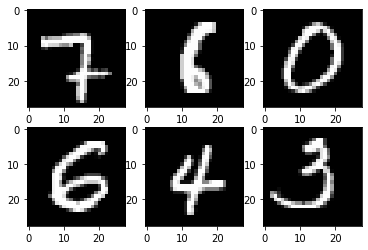

In [ ]:
# plotting some random images
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0] , cmap='gray')

In [ ]:
torch.tensor([1,2,3]).sum()#.item()

tensor(6)

In [ ]:
# define class
class FeedForward(nn.Module):
  def __init__(self,input_size ,hidden_size , n_classes):
    super(FeedForward , self).__init__()
    self.l1 = nn.Linear(input_size ,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size , n_classes)
  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = FeedForward(input_size , hidden_size , n_classes).to(device)

# loss , optimizer
criterion = nn.CrossEntropyLoss() #loss
optimizer = torch.optim.Adam( model.parameters() ,lr = learning_rate)
# training
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i , (inputs , targets) in enumerate(train_loader):
    # reshape inputs(100,1,28,28) => (100 , 28*28)
    inputs = inputs.view(-1,28*28).to(device)
    targets = targets.to(device)

    # forward
    pred = model(inputs)
    l1 = criterion(pred,targets)
    # backprog
    optimizer.zero_grad()
    l1.backward()
    optimizer.step()

    # printing
    if (i+1)%100 == 0:
      print(f"epcoh {epoch+1}/{num_epochs} , step : {i+1}/{n_total_steps} , loss : {l1.item():.2f}")


with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for i , (inputs , targets) in enumerate(test_loader):
    inputs = inputs.view(-1,28*28).to(device)
    targets = targets.to(device)
    # pred
    out = model(inputs)
    _,pred = torch.max(out , dim = 1)
    n_correct += (pred == targets).sum().item()
    n_samples += targets.shape[0]
  
  acc = 100 * n_correct / n_samples
  print(f'acc : {acc:.2f}')


epcoh 1/2 , step : 100/600 , loss : 0.48
epcoh 1/2 , step : 200/600 , loss : 0.45
epcoh 1/2 , step : 300/600 , loss : 0.20
epcoh 1/2 , step : 400/600 , loss : 0.20
epcoh 1/2 , step : 500/600 , loss : 0.16
epcoh 1/2 , step : 600/600 , loss : 0.24
epcoh 2/2 , step : 100/600 , loss : 0.17
epcoh 2/2 , step : 200/600 , loss : 0.12
epcoh 2/2 , step : 300/600 , loss : 0.25
epcoh 2/2 , step : 400/600 , loss : 0.23
epcoh 2/2 , step : 500/600 , loss : 0.11
epcoh 2/2 , step : 600/600 , loss : 0.11
acc : 95.38


# **Implementing a Convolutional neuarl network**

In [ ]:
#Exercise 

# **Transfer Learning**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets , models , transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time 
import os
import copy

In [ ]:
#device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# work with transforms
mean = np.array([0.485 ,0.456 ,0.406])
std = np.array([0.229 ,0.224 ,0.225])

data_transforms = {
    "train" :
        transforms.Compose([
        transforms.RandomResizedCrop(220),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean , std)                            
    ]),
    "val" : 
      transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(250),
      transforms.ToTensor(),
      transforms.Normalize(mean , std)                    
      ]),
}


In [ ]:
# Dealing with dara
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Datsets , DataLoader
data_dir ='/content/drive/MyDrive/Notebooks/Pytorch_Tutorial/hymenoptera_data.zip (Unzipped Files)/hymenoptera_data/'
sets = ['train' , 'val']
image_dataset = {x : datasets.ImageFolder(os.path.join(data_dir , x) , data_transforms[x]) for x in sets}
data_loaders = {x : DataLoader(image_dataset[x] , batch_size = 4 , shuffle = True , num_workers = 0) for x in sets}
dataset_sizes = {x : len(image_dataset[x]) for x in sets} 
print(dataset_sizes)
class_names = image_dataset['train'].classes
print(class_names)

{'train': 244, 'val': 153}
['ants', 'bees']


In [ ]:
A = np.random.rand(2,2,3)
A

array([[[0.40414624, 0.97916179, 0.97843442],
        [0.58613184, 0.1653862 , 0.9134577 ]],

       [[0.85400859, 0.40918424, 0.27281436],
        [0.5658334 , 0.75260135, 0.44823035]]])

In [ ]:
A.transpose(1,2,0) # (2,3,2)

array([[[0.40414624, 0.85400859],
        [0.97916179, 0.40918424],
        [0.97843442, 0.27281436]],

       [[0.58613184, 0.5658334 ],
        [0.1653862 , 0.75260135],
        [0.9134577 , 0.44823035]]])

torch.Size([3, 224, 890])
(224, 890, 3)


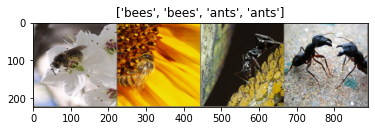

In [ ]:
def imshow(inp, title):
    """Imshow for Tensor."""
    print(inp.shape)
    inp = inp.numpy().transpose((1, 2, 0)) # in order to plot images, the channel dimention should be the last dim.
    print(inp.shape)
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()

# Get a batch of training data
inputs, classes = next(iter(data_loaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs) # concatenate images in a row (reduce from 4 dim into 3 dim)  (4,1,28,28) => (1,28,28*4)

imshow(out , title=[class_names[x] for x in classes])

In [ ]:
# Create the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in data_loaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.type(torch.float64) / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

## Finetuning vs Freezing

In [ ]:
#### Finetuning the convnet ####
model = models.resnet18(pretrained = True)
num_features = model.fc.in_features
# assign a new output size
model.fc = nn.Linear(num_features , 2)
model.to(device)
# loss , optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters() , lr = 0.05)

#scheduler
step_lr_schedu = lr_scheduler.StepLR(optimizer , step_size = 10 , gamma = 0.1)

model = train_model(model , criterion , optimizer , step_lr_schedu , num_epochs = 2)
### Freezing all the layers except the last layer
model = models.resnet18(pretrained = True)
for param in model.parameters():
  param.requires_grad= False
num_features = model.fc.in_features
# assign a new output size
model.fc = nn.Linear(num_features , 2)
model.to(device)
# loss , optimizer
criterion = nn.CrossEntropyLoss()
opimizer = optim.SGD(model.parameters() , lr = 0.05)

#scheduler
step_lr_schedu = lr_scheduler.StepLR(optimizer , step_size = 10 , gamma = 0.1)

model = train_model(model , criterion , optimizer , step_lr_schedu , num_epochs = 2)

Epoch 0/1
----------
train Loss: 3.7550 Acc: 0.5492
val Loss: 9.7473 Acc: 0.4771

Epoch 1/1
----------
train Loss: 3.2041 Acc: 0.4959
val Loss: 2.0744 Acc: 0.4314

Training complete in 0m 10s
Best val Acc: 0.477124
Epoch 0/1
----------
train Loss: 0.8098 Acc: 0.5000
val Loss: 0.8978 Acc: 0.4314

Epoch 1/1
----------
train Loss: 0.8001 Acc: 0.5164
val Loss: 0.9247 Acc: 0.4510

Training complete in 0m 9s
Best val Acc: 0.450980


# **Saving Model**

## Complete Model
  * torch.save(model , PATH)
  * torch.load(PATH)
  * model.eval()
  
## STATE DICT
  * torch.save(model.state_dict()))
  * model = Model(*args , **kwargs)
  * model.load_state_dict(torch.load(PATH))
  * model.eval()